In [8]:
# Import Pandas and Numpy to provide DataFrame support
# Import Folium to display the Maps for Visualisation
# Import Nominatim module to convert an address into latitude and longitude values as map rendering library
# Import SciKit Learn Libraries
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")
#font = {'size'   : 12}
#mpl.rc('font', **font)
#!conda install -c conda-forge folium
#import folium
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [14]:
#from folium.plugins import MarkerCluster
#from folium.plugins import FastMarkerCluster
#from folium import plugins
#from geopy.geocoders import Nominatim

#import yaml

#with open("config.yml", "r") as f:
#    cfg = yaml.load(f)
 
#search_params = {
#    'client_id': cfg['client_id'],
#    'client_secret': cfg['client_secret'],
#    'intent': 'browse',
#    'limit': 50,
#    'v': cfg['version']
#    }

#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
#from sklearn.model_selection import KFold, cross_val_score

#def cross_validate(model, n_splits = 10):
    
    #k_fold = KFold(n_splits = n_splits)
    #scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    #scores = np.percentile(scores, [40, 50, 60])
    #return scores

## Import and processing Los Angeles Crime dataset

This dataset reflects reported incidents of crime from Los Angeles between 2010 and 2015. The data is obtained from Kaggle but the general source is the Police Department of Los Angeles. The structure of the dataset is as follows.
Column Name 	Type 	Description
DR Number 	Plain Text 	Unique Records Division number of police Los Angeles
Date Reported 	Date 	Data when incident reported
Date Occurred 	Date 	Date when incident occurred
Time Occurred 	Time 	Time when incident occurred
Area ID 	Plain Text 	ID of area Los Angeles
Area Name 	Plain Text 	Name of area Los Angeles
Reporting District 	Plain Text 	Name of area Los Angeles
Crime Code 	Plain Text 	Code of Crine
Crime Code Description 	Plain Text 	Description of crime
MO Codes 	Plain Text 	MO Codes
Victim Age 	Plain Text 	Age of Victim
Victim Sex 	Plain Text 	Gender of Victim
Victim Descent 	Plain Text 	Victim Descent
Premise Code 	Plain Text 	Premise Code
Premise Description 	Plain Text 	Premise Description
Weapon Used Code 	Plain Text 	Weapon Used Code
Weapon Description 	Plain Text 	Weapon Description
Status Code 	Plain Text 	Status Code
Status Description 	Plain Text 	Status Description
Crime Code 1 	Plain Text 	Crime Code 1
Crime Code 2 	Plain Text 	Crime Code 2
Crime Code 3 	Plain Text 	Crime Code 3
Crime Code 4 	Plain Text 	Crime Code 4
Address 	Plain Text 	adress of incident
Cross Street 	Plain Text 	Name of crossing street
Location 	Location 	longitude and latitude of incident

## import of Los Angeles crime data set 2018 until june 2019

The full dataset, 2010 to present contains over 10M rows. 
I only use the 2018 en 2019 data, 326198 records, will be used. I want to use the columns below and these are only imported

In [33]:
#crime_keep_columns = ['DRNr',
#                      'DateOccurred',
#                      'AreaName', 
#                      'CrimeCodeDescription',
#                      'VictimAge',
#                      'VictimSex',
#                      'Latitude'
#                      'Longitude']

# Read from local
df_losangeles = pd.read_excel('LACRIMERED2018.xlsx',
                              sheet_name='LosAngeles2018')
print('Data Los Angeles downloaded and read into a dataframe!')

Data Los Angeles downloaded and read into a dataframe!


In [34]:
# viewing first five lines
df_losangeles.head()

,DRNr,DateOccurred,YearOccured,MonthOccurred,Year_Month,Time Occurred,AreaName,CrimeCodeDescription,VictimAge,VictimSex,latitude,longitude
0,170326543,2018-04-13,2018,4,2018-4,19:55,Wilshire,VEHICLE - STOLEN,0,M,34.452,-118.3351
1,170701073,2018-01-04,2018,1,2018-1,20:0,Wilshire,TRESPASSING,19,M,34.421,-118.3456
2,171616979,2018-02-25,2018,2,2018-2,9:40,Foothill,VEHICLE - STOLEN,0,M,34.2141,-118.3604
3,180100001,2018-09-18,2018,9,2018-9,0:35,Olympic,VEHICLE - STOLEN,32,F,34.382,-118.2889
4,180100513,2018-01-05,2018,1,2018-1,16:15,Central,BATTERY - SIMPLE ASSAULT,52,M,34.328,-118.2647


In [35]:
# viewing last five lines
df_losangeles.tail()

,DRNr,DateOccurred,YearOccured,MonthOccurred,Year_Month,Time Occurred,AreaName,CrimeCodeDescription,VictimAge,VictimSex,latitude,longitude
326193,192111884,2019-06-21,2019,6,2019-6,12:5,Topanga,SHOPLIFTING - PETTY THEFT ($950 & UNDER),35,M,34.1883,-118.6274
326194,199905748,2019-01-15,2019,1,2019-1,19:40,Southeast,KIDNAPPING,26,F,33.9449,-118.2367
326195,199907720,2019-02-01,2019,2,2019-2,21:26,Northeast,OTHER MISCELLANEOUS CRIME,0,X,34.1244,-118.1985
326196,199916823,2019-02-05,2019,2,2019-2,16:0,Devonshire,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,NaN,34.2227,-118.5361
326197,199916825,2019-01-07,2019,1,2019-1,16:0,Devonshire,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,NaN,34.2227,-118.5361


In [36]:
# print the dimensions of the dataframe
print(df_losangeles.shape)

(326198, 12)


The sample data file were download begin July of 2019. Ten years is too much for this excercise. I use 2018 and 2019 data, so a periode of 18 months which are the most recent data.

In [37]:
df_losangeles.dtypes

DRNr                             int64
DateOccurred            datetime64[ns]
YearOccured                      int64
MonthOccurred                    int64
Year_Month                      object
Time Occurred                   object
AreaName                        object
CrimeCodeDescription            object
VictimAge                        int64
VictimSex                       object
latitude                        object
longitude                       object
dtype: object

## Data Visualisaton
### number of crimes per month

In [38]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


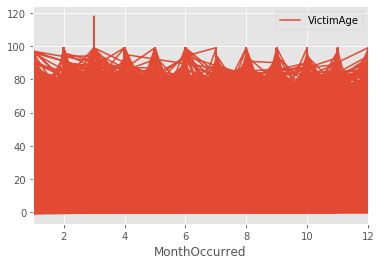

In [42]:
df_losangeles.plot(x='MonthOccurred',y='VictimAge')